<a href="https://colab.research.google.com/github/benassafma/441B-BenAssaf/blob/main/ECON_441B_HW8_Submission_(Mohanad_Ben_Assaf_505631393)_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

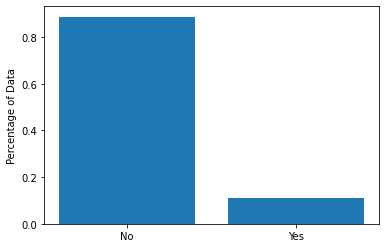

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

Since the we have a clearly imbalanced classes, we will use oversampling methods to balance the classes. Our selected method of choice will be SMOTE.

In [11]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_scaled, y_train = oversample.fit_resample(X_scaled,y_train)

In [12]:
y_train

,yes
0,0
1,0
2,0
3,0
4,0
...,...
51155,1
51156,1
51157,1
51158,1


We will now replot the classes distribution to ensure that the imbalance has been resolved

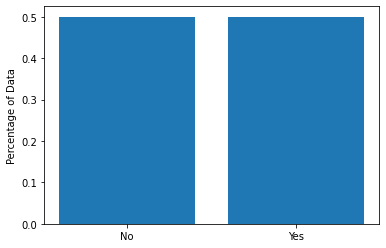

In [13]:
obs2 = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs2,len(y_train[y_train.yes==1])/obs2])
plt.ylabel("Percentage of Data")
plt.show()

From the above bar chart, we can clearly see that the classes are now balanced.

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [14]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.192\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.48\ngini = 0.284\nsamples = 19215\nvalue = [15925, 3290]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.119\nsamples = 10916\nvalue = [10221, 695]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.102\nsamples = 10704\nvalue = [10126, 578]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.495\nsamples = 212\nvalue = [95, 117]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.43\nsamples = 8299\nvalue = [5704, 2595]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 6010\nvalue = [3495, 2515]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 2289\nvalue = [2209, 80]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.422\nsamples = 31945\nvalue = [9655, 22290]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.343\nsamples = 26202\nvalue = [5749, 20453]\nclass 

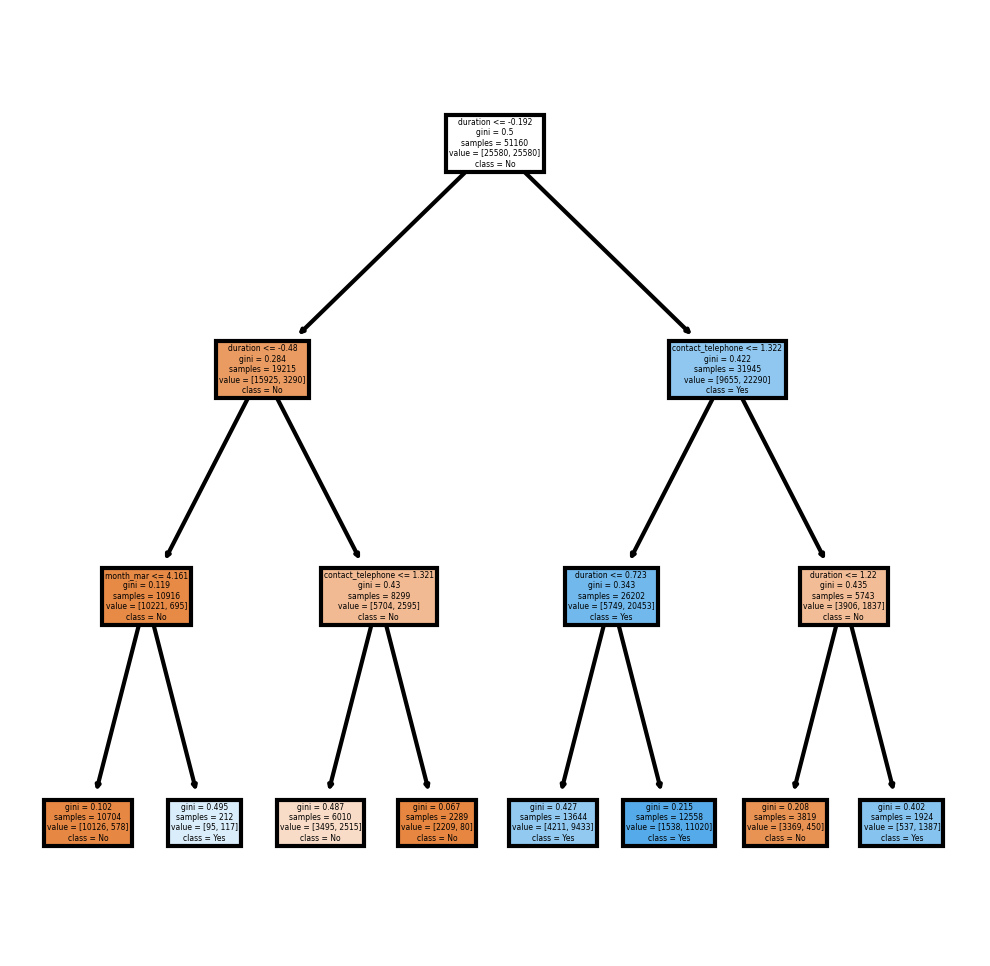

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 2b.) Confusion matrix on out of sample data. Visualize and store as variable

In [16]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("DT Accuracy:", accuracy)

DT Accuracy: 0.7511531925224569


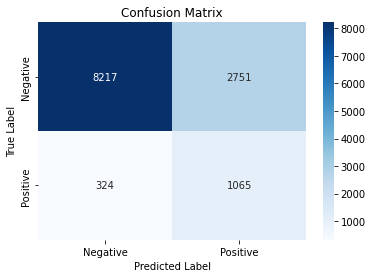

In [17]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [18]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Bagged DT Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagged DT Accuracy: 0.7522861535971515


In [19]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

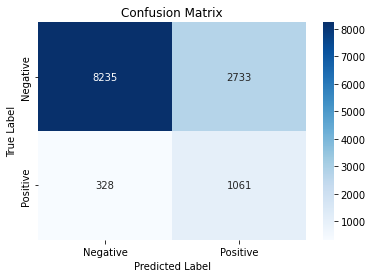

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [23]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("Bossted DT Accuracy:", accuracy)

Bossted DT Accuracy: 0.8888888888888888


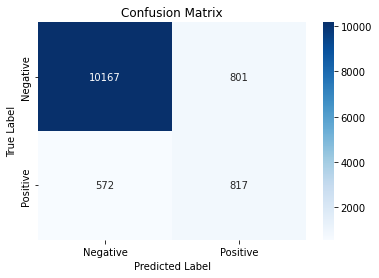

In [24]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [25]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 6.9 MB/s eta 0:00:00


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [27]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    QDA(),
    KNeighborsClassifier(n_neighbors=5),
    SVC()
]

super_learner = SuperLearner(folds=10, random_state =42)

super_learner.add(base_estimators)


### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)


### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

base_predictions


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([[0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0.]], dtype=float32)

In [28]:
### TRAIN YOUR METALEARNER

In [29]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions,y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
### INTERPRET COEFFICIENTS

In [31]:
log_reg.coef_

array([[ 1.40550178, -0.27450564, -7.78541267, 13.02538843,  1.29999857]])

The coefficients represent the weight (contribution) that each base learner prediction has on the final prediction and the sign represent the direction it has. 

Based on that we can see that KNN (#4) has the highest weight with a positive direction and Random Forest (#2) has the lowest weight in the a negative direction. Aside from that, logit had the second lowest weight in the positive direction, while QDA had the second highest weight in the negative direction. As for SVC, it had a relatively low weight in the positive direction. 

SL Accuracy: 0.8890507404709881


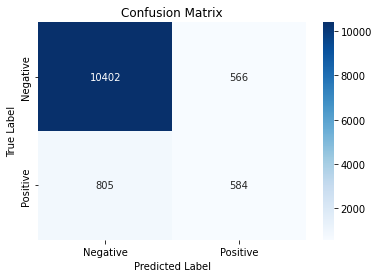

In [32]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX

y_true = y_test
cm_SL = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("SL Accuracy:", accuracy)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_SL, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [33]:
# Calculating the sensitivties and specificites of each model

# Decision Tree
spec_raw = cm_raw[0,0]/(cm_raw[0,0]+cm_raw[0,1])
sen_raw = cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1])

# Bagging
spec_bag = cm_bag[0,0]/(cm_bag[0,0]+cm_bag[0,1])
sen_bag = cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1])

# Boosting
spec_boost = cm_boost[0,0]/(cm_boost[0,0]+cm_boost[0,1])
sen_boost = cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1])

# Super Learner
spec_SL = cm_SL[0,0]/(cm_SL[0,0]+cm_SL[0,1])
sen_SL = cm_SL[1,1]/(cm_SL[1,0]+cm_SL[1,1])

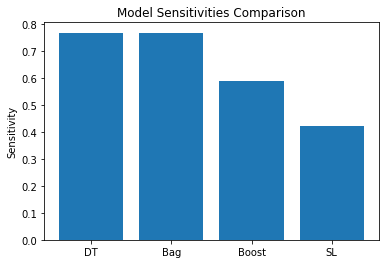

In [34]:
# Sensitivities Bar Chart 
plt.title("Model Sensitivities Comparison")
plt.bar(["DT","Bag","Boost","SL"],[sen_raw,sen_bag,sen_boost,sen_SL])
plt.ylabel("Sensitivity")
plt.show()

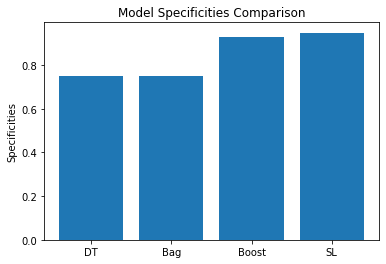

In [35]:
# Specificities Bar Chart 
plt.title("Model Specificities Comparison")
plt.bar(["DT","Bag","Boost","SL"],[spec_raw,spec_bag,spec_boost,spec_SL])
plt.ylabel("Specificities")
plt.show()

From the bar charts above, we can see that the super learner model produces the highest specificity while it has the lowest sensitivity.